#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 24 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

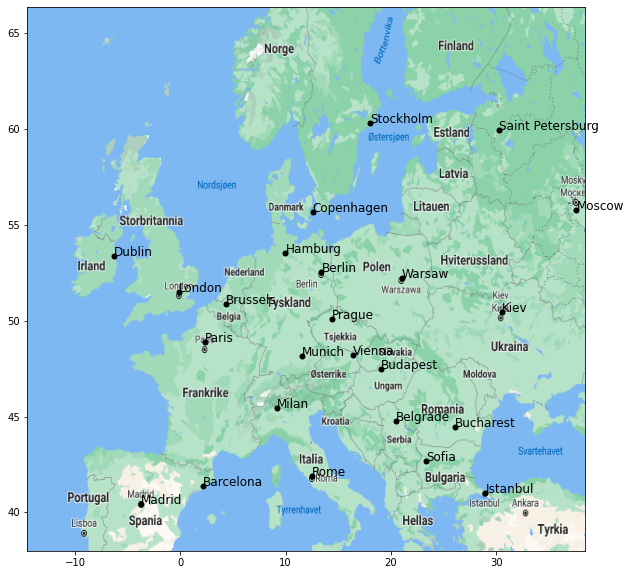

In [2]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [3]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);
    plt.show();

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


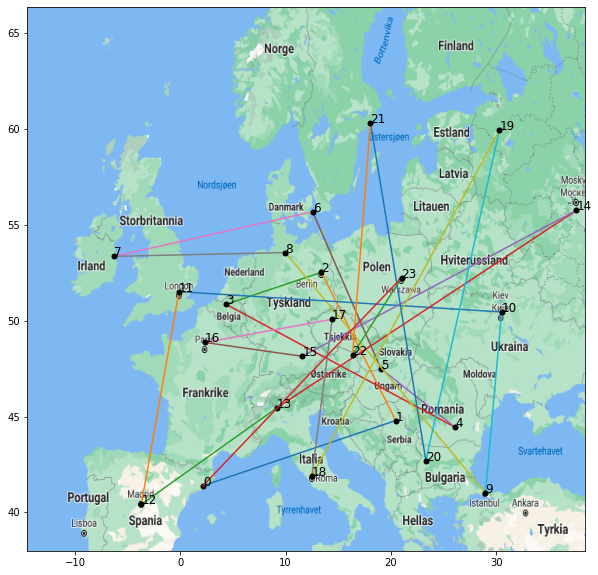

In [4]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

Time:  0.0021059513092041016 seconds
Shortest distance (km) = 3911.27840024053
Best tour = ['Barcelona', 'Brussels', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest']


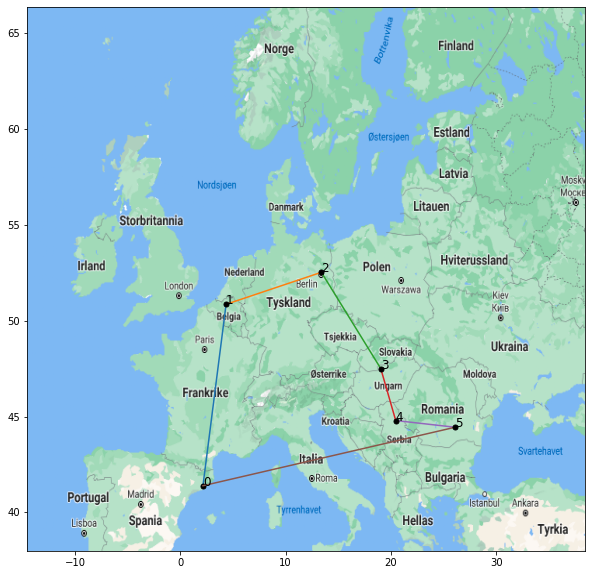

Time:  16.01706099510193 seconds
Shortest distance (km) = 6442.393480691684
Best tour = ['Istanbul', 'Bucharest', 'Belgrade', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Barcelona', 'Dublin']


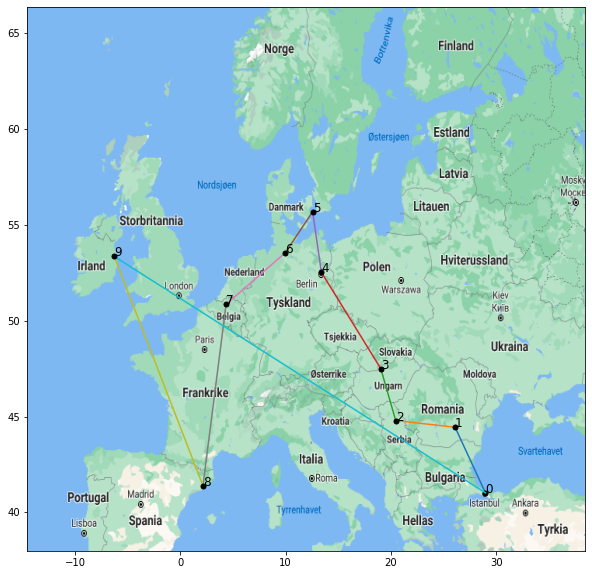

In [569]:
# Implement the algorithm here
import itertools
import time
import math 

'''
get_distance() solution inspired by answers from the following
stackoverflow thread:
https://stackoverflow.com/questions/5228383/how-do-i-find-the-distance-between-two-points

'''
#Returns distance between longitude and latitude points from two cities (implementation of Pythagorean theorem) 
def get_distance(city1, city2):
    #x,y coordinates for the two cities we want to find the distance of
    x1, y1 = city1[1]
    x2, y2 = city2[1]
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

#Returns total distance of a tour
def tour_leng(tour):
    distance = 0
    for i in range(len(tour)-1):
        distance += get_distance(tour[i], tour[i+1]) 
    return distance

#Returns a list of city names for the best tour and the shortest distance for this tour
def exhaustive_search(cities, n_cities):
    #Makes a new dictionary contatining the first n cities that we want to use
    cities = {key: val for key, val in list(cities.items())[:n_cities]} 
    shortest_distance = float('inf')
    best_tour = None
    start = time.time()

    for tour in itertools.permutations(cities.items()):
        distance = tour_leng(tour)
        #print(tour)
        #distance = 0
        #for i in range(len(tour) - 1):
            #distance += get_distance(tour[i], tour[i + 1])
        if distance < shortest_distance:
            shortest_distance = distance
            best_tour = tour

    end = time.time()
    print("Time: ", end - start, "seconds")
    distance_km = shortest_distance * (2 * math.pi * 6371) / 360 
    print("Shortest distance (km) = {}".format(distance_km))
    best_tour = [city[0] for city in best_tour]
    print("Best tour = {}".format(best_tour))
    return best_tour, shortest_distance



best_tour, shortest_distance = exhaustive_search(city_coords, 6)
#print(shortest_distance)
plot_plan(best_tour)

best_tour2, shortest_distance2 = exhaustive_search(city_coords, 10)
#print(shortest_distance)
plot_plan(best_tour2)

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [128]:
# Answer
'''
The shortest tour for the first 10 citites is in this order:
['Istanbul', 'Bucharest', 'Belgrade', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Barcelona', 'Dublin'].

The program took 16.01706099510193 seconds to find the shortest tour. 

The calculation of how long it would take to perform exhaustive search on all 24 cities will be shown in the code under:
'''
old_time = 16 #seconds
for i in range(11,25):
    old_time*=i
    
print(f'Number of years it would take to perform exhaustive search on all 24 cities: {old_time/3600/24/365}')


Number of years it would take to perform exhaustive search on all 24 cities: 86747309328.1315


## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

/var/folders/r4/f80qwh6n3yx9s80fv586b9xc0000gn/T/ipykernel_42803/179823614.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  random_solution = random.permutation(city_list)


Time:  0.01063227653503418 seconds
Time:  0.008198261260986328 seconds
Time:  0.005377054214477539 seconds
Time:  0.004651069641113281 seconds
Time:  0.003072023391723633 seconds
Time:  0.004133939743041992 seconds
Time:  0.00585484504699707 seconds
Time:  0.0040361881256103516 seconds
Time:  0.0028150081634521484 seconds
Time:  0.004842042922973633 seconds
Time:  0.003007173538208008 seconds
Time:  0.003754854202270508 seconds
Time:  0.004104137420654297 seconds
Time:  0.003494739532470703 seconds
Time:  0.0029489994049072266 seconds
Time:  0.0025141239166259766 seconds
Time:  0.002936124801635742 seconds
Time:  0.0025129318237304688 seconds
Time:  0.0016810894012451172 seconds
Time:  0.0029418468475341797 seconds


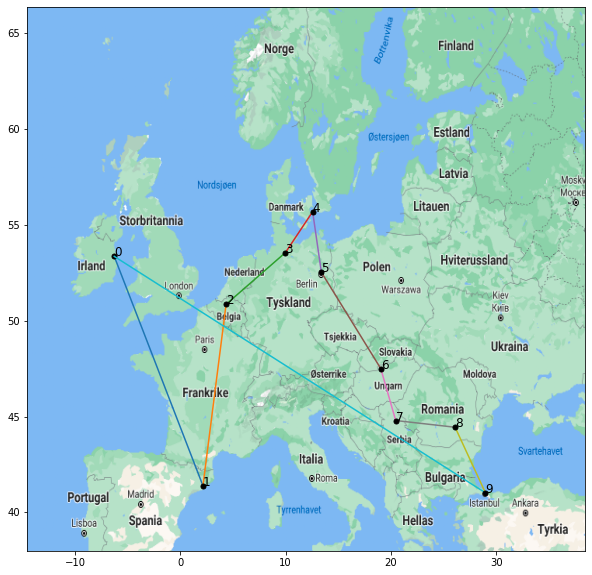

Best tour (10 cities): ['Dublin', 'Barcelona', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul']
Time:  0.10138916969299316 seconds
Time:  0.10040783882141113 seconds
Time:  0.10044407844543457 seconds
Time:  0.12529206275939941 seconds
Time:  0.11727118492126465 seconds
Time:  0.14665007591247559 seconds
Time:  0.12549996376037598 seconds
Time:  0.1316239833831787 seconds
Time:  0.11350202560424805 seconds
Time:  0.08816909790039062 seconds
Time:  0.12527704238891602 seconds
Time:  0.11278009414672852 seconds
Time:  0.10645103454589844 seconds
Time:  0.10744428634643555 seconds
Time:  0.11910510063171387 seconds
Time:  0.13244390487670898 seconds
Time:  0.12590694427490234 seconds
Time:  0.08780097961425781 seconds
Time:  0.15706825256347656 seconds
Time:  0.10888791084289551 seconds


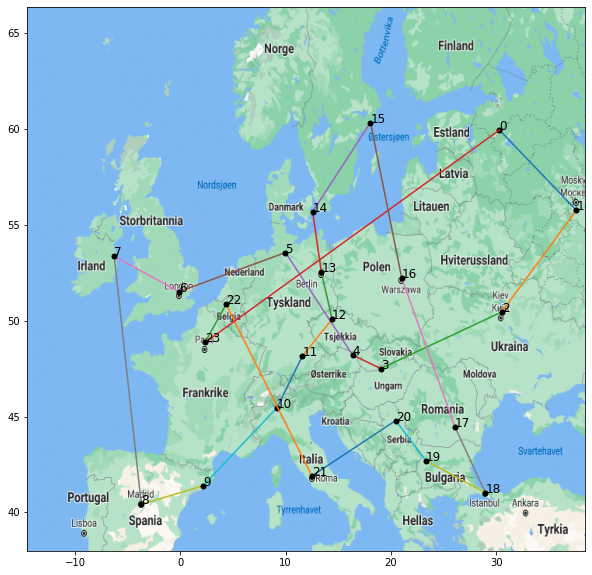

Best tour (24 cities): ['Saint Petersburg', 'Moscow', 'Kiev', 'Budapest', 'Vienna', 'Hamburg', 'London', 'Dublin', 'Madrid', 'Barcelona', 'Milan', 'Munich', 'Prague', 'Berlin', 'Copenhagen', 'Stockholm', 'Warsaw', 'Bucharest', 'Istanbul', 'Sofia', 'Belgrade', 'Rome', 'Brussels', 'Paris']

**Report of 20 runs with 10 cities**
Shortest distance (km): 6442.393480691684
Worst distance (km): 8764.30357091507
Mean distance (km): 7315.320847832147
Standard diviation: 933.0071022685241

**Report of 20 runs with 24 cities**
Shortest distance (km): 15190.578547854877
Worst distance (km): 21163.112494368634
Mean distance (km): 17902.388605553417
Standard diviation: 1502.4973525096063


In [591]:
# Implement the algorithm here
import time
import numpy as np
from numpy import random
import statistics 

#Returns distance between longitude and latitude points from two cities (implementation of Pythagorean theorem) 
def get_dist(city1, city2):
    #x,y coordinates for the two cities we want to find the distance of
    #if verbose print(city1)
    x1, y1 = city1[1]
    x2, y2 = city2[1]
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

#Returns total distance of a tour
def tour_length(tour):
    distance = 0
    for i in range(len(tour)-1):
        distance += get_dist(tour[i], tour[i+1])  
    return distance

'''
Chapter 9.4.3 Machine Learning, 2nd Edition

'''
#Returns random permutation of cities 
def random_tour(cities, n_cities):
    cities = {key: val for key, val in list(city_coords.items())[:n_cities]}
    city_list = list(cities.items())
    random_solution = random.permutation(city_list)
    random_city_dict = dict(random_solution)
    return list(random_city_dict.items())

#Returns best tour and shortest distance of tsp using hill climbing algorithm 
def hill_climb(cities, n_cities):
    cities = {key: val for key, val in list(cities.items())[:n_cities]} 
    #Start with a random solution for a tour
    current_solution = random_tour(cities, n_cities)
    best_tour = current_solution
    shortest_distance = tour_length(best_tour)
    start = time.time()
    while True:
        current_distance = shortest_distance
        #List for all neighbour solutions 
        neighbour_solution = []
        for i in range(len(current_solution)):
            for j in range(len(current_solution)):
                if i != j: 
                    neighbour = best_tour.copy()
                    #We find neighbours by 
                    neighbour[i] = best_tour[j]
                    neighbour[j] = best_tour[i]
                    neighbour_tour_length = tour_length(neighbour)
                    neighbour_solution.append([neighbour,neighbour_tour_length])
               
        for neighbour_list in neighbour_solution:
            if neighbour_list[1] < shortest_distance:
                shortest_distance = neighbour_list[1]
                best_tour = neighbour_list[0]

        #print("shortest_distance = {}".format(shortest_distance))
        #print("current_distance = {}".format(current_distance))
        
        #If this condition is true there were no improvents to be found and the loop stops and we return our data
        if current_distance == shortest_distance:
            end = time.time()
            print("Time: ", end - start, "seconds")
            shortest_distance_km = shortest_distance * (2 * math.pi * 6371) / 360 
            best_tour = [city[0] for city in best_tour]
            return best_tour, shortest_distance_km       

# Report the length of the tour of the best, worst and mean of 20 runs 

tour_length_10 = []
tour_length_24 = []
for i in range(0,20):
    best_tour, shortest_distance = hill_climb(city_coords, 10)
    tour_length_10.append(shortest_distance)
    if i == 19:
        plot_plan(best_tour)
        print("Best tour (10 cities): {}".format(best_tour))

for i in range(0,20):
    best_tour, shortest_distance = hill_climb(city_coords, 24)
    tour_length_24.append(shortest_distance)
    if i == 19:
        plot_plan(best_tour)
        print("Best tour (24 cities): {}".format(best_tour))

best_tour_length_10 = min(tour_length_10)
worst_tour_length_10 = max(tour_length_10)
mean_tour_length_10 = sum(tour_length_10) / len(tour_length_10)
stand_div_10 = statistics.stdev(tour_length_10)
print("")
print("**Report of 20 runs with 10 cities**")
print("Shortest distance (km): {}".format(best_tour_length_10))
print("Worst distance (km): {}".format(worst_tour_length_10))
print("Mean distance (km): {}".format(mean_tour_length_10))
print("Standard diviation: {}".format(stand_div_10))
print("")

best_tour_length_24 = min(tour_length_24)
worst_tour_length_24 = max(tour_length_24)
mean_tour_length_24 = sum(tour_length_24) / len(tour_length_24)
stand_div_24 = statistics.stdev(tour_length_24)

print("**Report of 20 runs with 24 cities**")
print("Shortest distance (km): {}".format(best_tour_length_24))
print("Worst distance (km): {}".format(worst_tour_length_24))
print("Mean distance (km): {}".format(mean_tour_length_24))
print("Standard diviation: {}".format(stand_div_24))

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

/var/folders/r4/f80qwh6n3yx9s80fv586b9xc0000gn/T/ipykernel_42803/1376435283.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  random_solution = random.permutation(city_list)


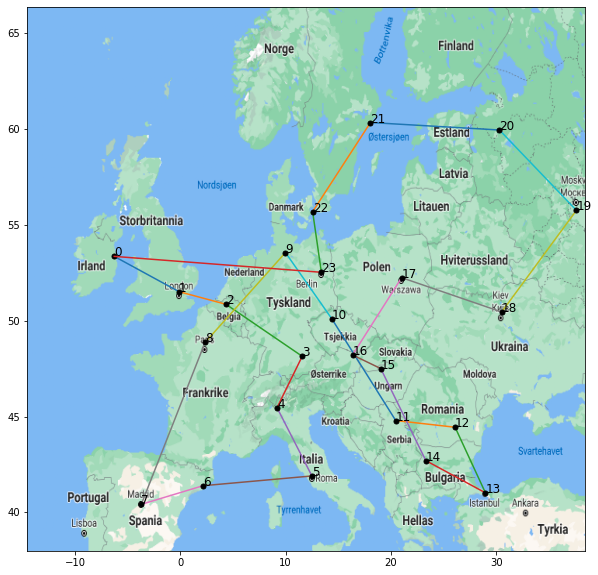

Best tour (population = 50): ['Dublin', 'London', 'Brussels', 'Munich', 'Milan', 'Rome', 'Barcelona', 'Madrid', 'Paris', 'Hamburg', 'Prague', 'Belgrade', 'Bucharest', 'Istanbul', 'Sofia', 'Budapest', 'Vienna', 'Warsaw', 'Kiev', 'Moscow', 'Saint Petersburg', 'Stockholm', 'Copenhagen', 'Berlin']

**Report of 20 runs with population size =  50 **
Shortest distance (km): 15530.974707704712
Worst distance (km): 19098.082182386315
Mean distance (km): 17223.402025867807
Standard diviation: 875.3385192463642



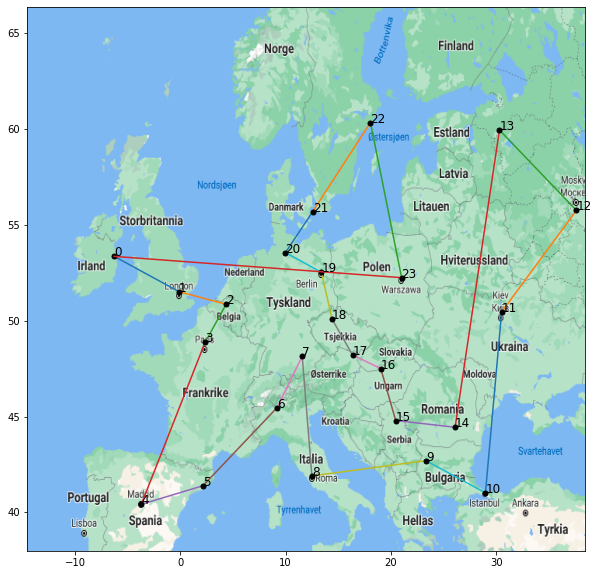

Best tour (population = 250): ['Dublin', 'London', 'Brussels', 'Paris', 'Madrid', 'Barcelona', 'Milan', 'Munich', 'Rome', 'Sofia', 'Istanbul', 'Kiev', 'Moscow', 'Saint Petersburg', 'Bucharest', 'Belgrade', 'Budapest', 'Vienna', 'Prague', 'Berlin', 'Hamburg', 'Copenhagen', 'Stockholm', 'Warsaw']

**Report of 20 runs with population size =  250 **
Shortest distance (km): 14826.823475456313
Worst distance (km): 17726.68649934976
Mean distance (km): 16000.513063425877
Standard diviation: 943.8037943014305



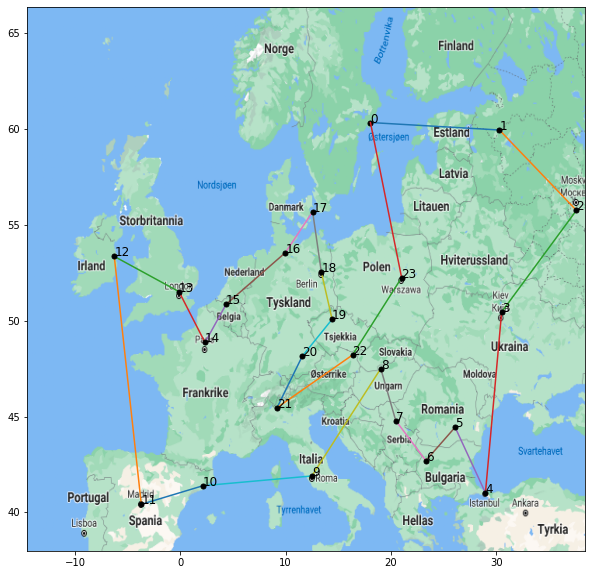

Best tour (population = 500): ['Stockholm', 'Saint Petersburg', 'Moscow', 'Kiev', 'Istanbul', 'Bucharest', 'Sofia', 'Belgrade', 'Budapest', 'Rome', 'Barcelona', 'Madrid', 'Dublin', 'London', 'Paris', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Prague', 'Munich', 'Milan', 'Vienna', 'Warsaw']

**Report of 20 runs with population size =  500 **
Shortest distance (km): 14429.652103638336
Worst distance (km): 16668.461664047984
Mean distance (km): 15476.945282098732
Standard diviation: 579.5449751745226



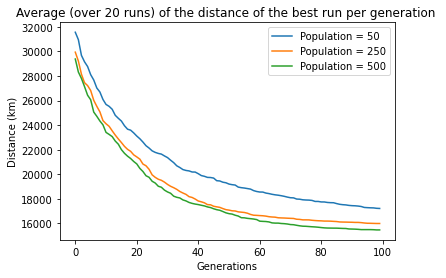

In [646]:
# Implement the algorithm here

import pprint
import copy
from operator import itemgetter

# Returns Euclidean distance between two cities
def find_distance(city1, city2):
    # x,y coordinates for the two cities we want to find the distance of
    x1, y1 = city1[1]
    x2, y2 = city2[1]
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Returns a list of a random permutation of a tour
def random_tour(cities, n_cities):
    cities = {key: val for key, val in list(city_coords.items())[:n_cities]}
    city_list = list(cities.items())
    random_solution = random.permutation(city_list)
    random_city_dict = dict(random_solution)
    random_city_list = list(random_city_dict.items())
    #print("random_city_list = {}".format(random_city_list))
    return random_city_list

# Returns fitness as a function of a list of tuples, each containing a city name (string) and GPS coordinates [Lat, Lon]
def get_fitness(tour):
    total_distance = 0
    for i in range(len(tour)-1):
        total_distance += find_distance(tour[i], tour[i+1])
    return 100/total_distance #Fitness high -> distance low, fitness low -> distance high

def sort_population(population):
    return sorted(population, key=itemgetter(1), reverse=True)

# Returns a list of tours as our starting population of tours     
def init_population(cities, n_cities, population_size):
    tour_population = []
    cities = {key: val for key, val in list(cities.items())[:n_cities]}
    # Our initial population will start with randoum tours
    for i in range(population_size):
        tour = random_tour(cities, n_cities)
        tour_population.append([tour, get_fitness(tour)]) # Fitness value is also added for each tour
    return tour_population

# Returns a Fitness-Proportionate Selection (FPS) of tours from the current population to serve as parents for the next generation
def parent_selection_fps(population): 
    parents = []
    n_parents = len(population)*2 
    total_fitness = 0
    population_copy = copy.deepcopy(population)
    
    #Find the total fitness for all individuals of a population 
    for tour_copy in population_copy:
        total_fitness += tour_copy[1] # tour_copy[1] should be an int
        #We also include the fitness for each individual which will be used to determine if an individual will be selected as a parent
        tour_copy.append(total_fitness) 
    
    for i in range(n_parents):
        #Propability for individual i to be selected for mating
        rand_float = random.uniform(0.0, total_fitness)
        #Now we begin selecting based on FPS
        for tour_copy in population_copy:
            if tour_copy[2] > rand_float: 
                parents.append(tour_copy[0:2]) #Append everything except the fitness
                break
    
    return parents

# Returns a set of children, which have undergone horrific amounts of genetic crossover and point swap mutations
def get_children(parents):
    children = []
    # For each pair of parents we make offspring 
    for i in range(0, len(parents), 2):
        # First we perform crossover with two parents - pmx_pair will give us two children 
        crossover_children = pmx_pair(parents[i][0], parents[i+1][0])
        # With the crossover children we mutate them and add them to the list of children, with a fitness value for each child
        mutated_child0 = swap_mutation(crossover_children[0]) 
        mutated_child1 = swap_mutation(crossover_children[1])
        children.append([mutated_child0, get_fitness(mutated_child0)])
        children.append([mutated_child1, get_fitness(mutated_child1)])

    return children 

# Takes an unaltered slice from a and copies it to a child. Then copies the remaining indices from a slice of b.
def pmx(a, b, start, stop):
    '''
    Week 3 exercise solution 
    '''
    #print("a = {}".format(a))
    #print("b = {}".format(b))
    #a = [ale, ber, cai, del]
    #b = [ale, del, ber, cai]
    child = [None]*len(a)
    #c = [None, None , None , None]
    # Copy a slice from first parent:
    child[start:stop] = a[start:stop]
    #c = [ale, ber, None, None]
    # Map the same slice in parent b to child using indices from parent a:

    for ind, x in enumerate(b[start:stop]): # Generates an iterable object with indices ind and values x. (so something like [0, alexandria])
        ind += start #1
        if x not in child:
            while child[ind] != None:
                ind = b.index(a[ind])
            child[ind] = x # c = [ale, ber, del, None]
    # Copy over the rest from parent b
    for ind, x in enumerate(child):
        if x == None:
            child[ind] = b[ind] # c = [ale, ber, del, cai]
    
    #print("child = {}".format(child))            
    return child

# Returns a pair of children with partially mapped crossover
def pmx_pair(a, b):
    '''
    Week 3 exercise solution 
    '''
    half = len(a) // 2
    start = np.random.randint(0, len(a)-half)
    stop = start+half
    #print("start = {}, stop = {}".format(start,stop))
    return_value = [pmx(a, b, start, stop), pmx(b, a, start, stop)]
    #print("return_value = {}".format(return_value))
    return [pmx(a, b, start, stop), pmx(b, a, start, stop)]

# Returns genotype where two positions of elements are swapped
def swap_mutation(genotype):
    '''
    Week 3 exercise solution 
    '''
    #print("start_genotype= {}".format(genotype))
    locuses = np.random.choice(len(genotype), 2, replace=False)
    #print("locuses = {}".format(locuses))
    # Two random elements from our individuals are located and swapped 
    genotype[locuses[0]], genotype[locuses[1]] = genotype[locuses[1]], genotype[locuses[0]]
    #print("end_genotype= {}".format(genotype))
    return genotype
      
# Returns a new population based on elitism and fps 
# keep_best_tours is a parameter for including elitism in our generations. It ensures that some of our best solutions will be carried on to the next generations
def survivor_selection(population_size, old_population, offspring, keep_best_tours): 
    # The potential population will consist of individuals from the old population and the new population
    potential_population = old_population + offspring
    potential_population = sort_population(potential_population) 
    new_population = potential_population[:keep_best_tours] #Keep the best tours so far (elitism)
    
    # Here we do the same concept as we did in fps for parent selection
    total_fitness = 0
    fps_population = copy.deepcopy(potential_population)
    for tour_copy in fps_population:
        total_fitness += tour_copy[1]
        tour_copy.append(total_fitness) 
    
    # This time we make sure that our population size for the new population is the same as the old population size
    for i in range(population_size - len(new_population)): #(0,pop_size-len(new_population)): 
        rand_float = random.uniform(0.0, total_fitness)
        # Now we begin selecting based on FPS
        for tour_copy in fps_population:
            if tour_copy[2] > rand_float: 
                new_population.append(tour_copy[0:2]) #Append everything except the fitness 
                break
    #print("len_new_population = {}".format(len(new_population)), end=" ")
    return new_population


# In this function we will run the different methods for selection for n generations
# Returns a list of the shortest distance for a tour per generation (will be used for graph).
# Also returns list of city names for the best tour found in the final generation (will be used for plotting on map)
def genetic_algorithm(cities, n_cities, population_size, n_generations, keep_best_tours):
    cities = {key: val for key, val in list(cities.items())[:n_cities]}
    #start = time.time()
    population = init_population(cities, n_cities, population_size)
    #pop_size = len(population)
    # List for later when plotting - it consists of the shortest distance for a tour per generation 
    best_dist_per_gen = []    
    # For each generation we select parents, then offspring based on the parents and then a new generation
    for i in range(n_generations):
        parents = parent_selection_fps(population)
        children = get_children(parents)
        new_generation = survivor_selection(population_size, population, children, keep_best_tours)
        sorted_route_per_gen = sort_population(new_generation)
        # The best route for a generation will be the first route in the sorted version
        best_route_gen = sorted_route_per_gen[0]
        best_dist_per_gen.append(tour_length(best_route_gen[0])* (2 * math.pi * 6371) / 360)
        population = new_generation
    
    #Find the best route and shortest distance for the final generation
    sorted_route = sort_population(population)
    best_route = sorted_route[0] 
    total_distance = tour_length(best_route[0])
    best_route_names = [city[0] for city in best_route[0]]
    #end = time.time()
    #print("Time: ", end - start, "seconds")
    return best_dist_per_gen, best_route_names


# Returns a list of the average distance of every generation when running the GA algorithm n_runs
def report_algo(n_runs, cities, n_cities, population_size, n_generations, keep_best_tours):
    #List for adding all best distances from each generation
    tour_length_pop = []
    #List used for finding out the best, worst, mean and standard deviation of the last generation
    print_list = []
    
    for i in range(0, n_runs):
        best_dist_per_gen, best_route_names = genetic_algorithm(cities, n_cities, population_size, n_generations, keep_best_tours)
        #We add the best/shortest distance from every generation
        tour_length_pop.append(best_dist_per_gen) 
        # Last element is the best/shortest distance of the last generation
        print_list.append(best_dist_per_gen[-1])
        # In the last run we plot an example of the best tour in the last generation
        if i == 19: 
            plot_plan(best_route_names)
            print("Best tour (population = {}): {}".format(population_size, best_route_names))
    
    avg_best_tour = []
    for n in range(0, n_generations):
        total = 0
        for m in range(0, n_runs):
            total += tour_length_pop[m][n]  
        total = total/n_runs
        avg_best_tour.append(total)
    
    #Print statement for best, worst, mean and standard deviation of the best individual of last generations out of the 20 runs
    best_tour_length = min(print_list)
    worst_tour_length = max(print_list)
    mean_tour_length = sum(print_list) / len(print_list)
    stand_div = statistics.stdev(print_list)
    print("")
    print("**Report of 20 runs with population size = ", population_size, "**")
    print("Shortest distance (km): {}".format(best_tour_length))
    print("Worst distance (km): {}".format(worst_tour_length))
    print("Mean distance (km): {}".format(mean_tour_length))
    print("Standard diviation: {}".format(stand_div))
    print("")
    return avg_best_tour

avg50 = report_algo(20, city_coords, 24, 50, 100, 5)
avg250 = report_algo(20, city_coords, 24, 250, 100, 25)
avg500 = report_algo(20, city_coords, 24, 500, 100, 50)

#Plotting the 
fig = plt.figure()
plt.title('Average (over 20 runs) of the distance of the best run per generation ')
plt.plot(avg50)
plt.plot(avg250)
plt.plot(avg500)
plt.ylabel('Distance (km)') 
plt.xlabel('Generations')
plt.legend(['Population = 50', 'Population = 250', 'Population = 500'])
plt.show()

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

# Answer

Between the three different variants of population size I would say that the GA with a population of 250 is the best, in terms of tour length and number of generations of evolution time. This variant is more effective than the variant with population of 500. There is also not a huge difference between the shortest path of these two variants. 

Among the first 10 cities, my GA found the shortest tour. The distance for the best tour was identical.

For both running 10 and 24 cities, it ran a lot faster than exhaustive search. There was a clear difference in running time. GAs running time depends on the population size and number of generations, but with 10 cities the GA could find the shortest route in around 0.66 seconds compared to 16.6 seconds with the exhaustive search. 

I estimate that the number of tours inspected in the GA is: 2 x p x g where p is the population size and g is the number of generations. This stems from the fact that for any given generation, the set of tours which is inspected consists of the population itself as well as the children. The number of children equals half the number of parents, and the number of the parents is twice the population, therefore the number of children equals the size of the population itself. Since there are g generations with 2 x p tours for each generation we end up with 2 x p x g.  

E.g. we run the GA with a population of 50, and 100 generations. In this case it would be around 10 000 tours inspected. 

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [10]:
# Implement algorithm here